In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 

# sns.set_style(style='white')
sns.set_context(context ='paper')

pd.set_option('max_columns',50)
pd.set_option('max_rows',500)

font_path = 'c:/Windows/Fonts/NanumSquareRoundR.ttf'
fontprop = font_manager.FontProperties(fname=font_path)

In [2]:
naver = pd.read_csv('naver.csv')
naver_month = pd.read_csv('naver_month.csv')

In [3]:
seoul = pd.read_csv('seoul_month_air.csv')

In [4]:
seoul.columns

Index(['측정월', '측정소명', '이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)',
       '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'],
      dtype='object')

In [5]:
seoul.측정월 = seoul.측정월.map(str)

In [6]:
def cut_year(x):
    return int(x[:4])
def cut_month(x):
    return int(x[4:])

seoul['년'] = seoul.측정월.map(cut_year) 
seoul['월'] = seoul.측정월.map(cut_month)

In [7]:
def month(x):
    return int(x.split('-')[1])
def day(x):
    return int(x.split('-')[2])

naver['월'] = naver.날짜.map(month)
naver['일'] = naver.날짜.map(day)

In [8]:
seoul.head()

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),년,월
0,201811,강남구,0.046,0.006,0.6,0.006,34.0,19.0,2018,11
1,201811,강남대로,0.053,0.005,0.9,0.005,43.0,24.0,2018,11
2,201811,강동구,0.045,0.006,0.7,0.006,48.0,23.0,2018,11
3,201811,강변북로,0.058,0.005,0.8,0.005,44.0,27.0,2018,11
4,201811,강북구,0.030,0.014,0.6,0.003,23.0,16.0,2018,11


### 대상 : 서울시
### 데이터 출처 : 서울시 공공데이터, 네이버 데이터 랩

In [9]:
seoul.년.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987],
      dtype=int64)

## 연도별 미세먼지, 초미세먼지

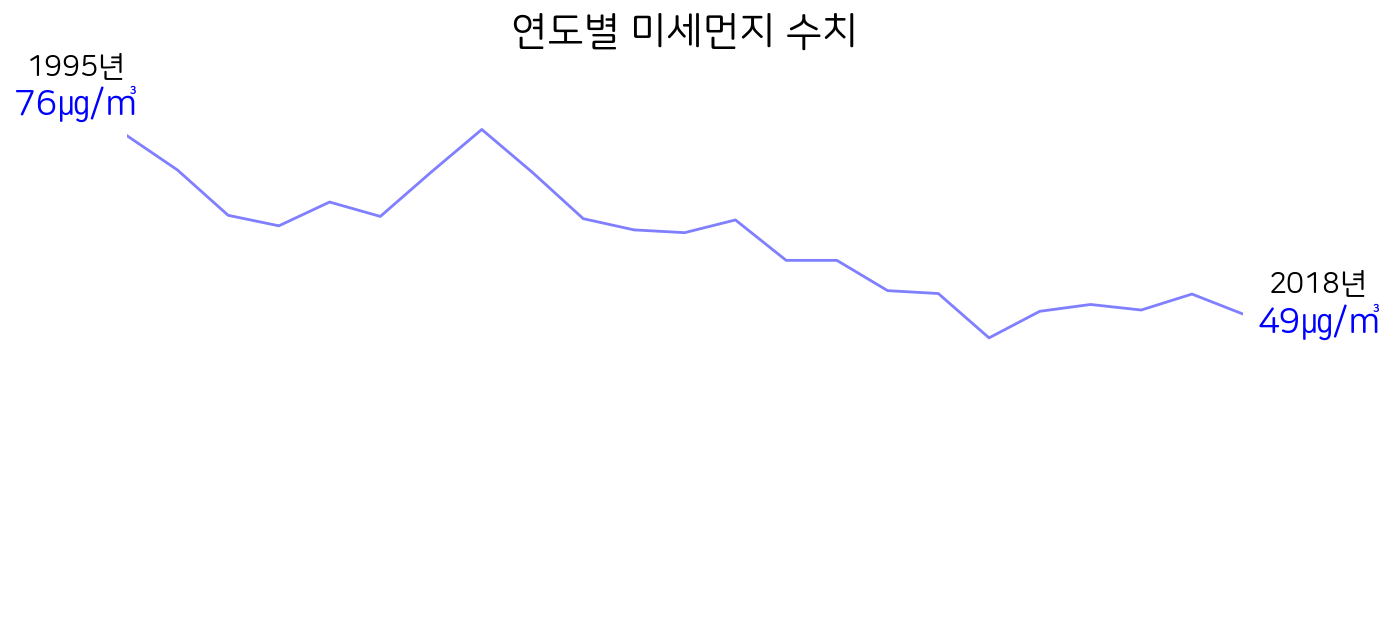

In [10]:
plt.figure(figsize=(10,5))
seoul.groupby('년')['미세먼지(㎍/㎥)'].mean()[8:-1].plot(color='b',alpha=0.5)
sns.despine(left = True, bottom = True)
plt.ylim([0,90])
plt.title('연도별 미세먼지 수치', fontproperties = fontprop, size = 20)
plt.xlabel('')
plt.yticks([])
plt.xticks([])
plt.text(1994,88,'1995년',horizontalalignment='center',verticalalignment='center', fontproperties = fontprop, fontsize = 15)
plt.text(2018.5,52,'2018년',horizontalalignment='center',verticalalignment='center', fontproperties = fontprop,fontsize = 15)
plt.text(1994,82,'76㎍/㎥',horizontalalignment='center',verticalalignment='center', fontproperties = fontprop, fontsize = 18,color='b')
plt.text(2018.5,46,'49㎍/㎥',horizontalalignment='center',verticalalignment='center', fontproperties = fontprop,fontsize = 18,color='b')
plt.show()

## 1년 중 미세먼지가 안 좋은 달은? 시계열
- 메터로 할지 아니면 뭐 최근 5년 이렇게 할지

Text(0,0.5,'미세먼지(㎍/㎥)')

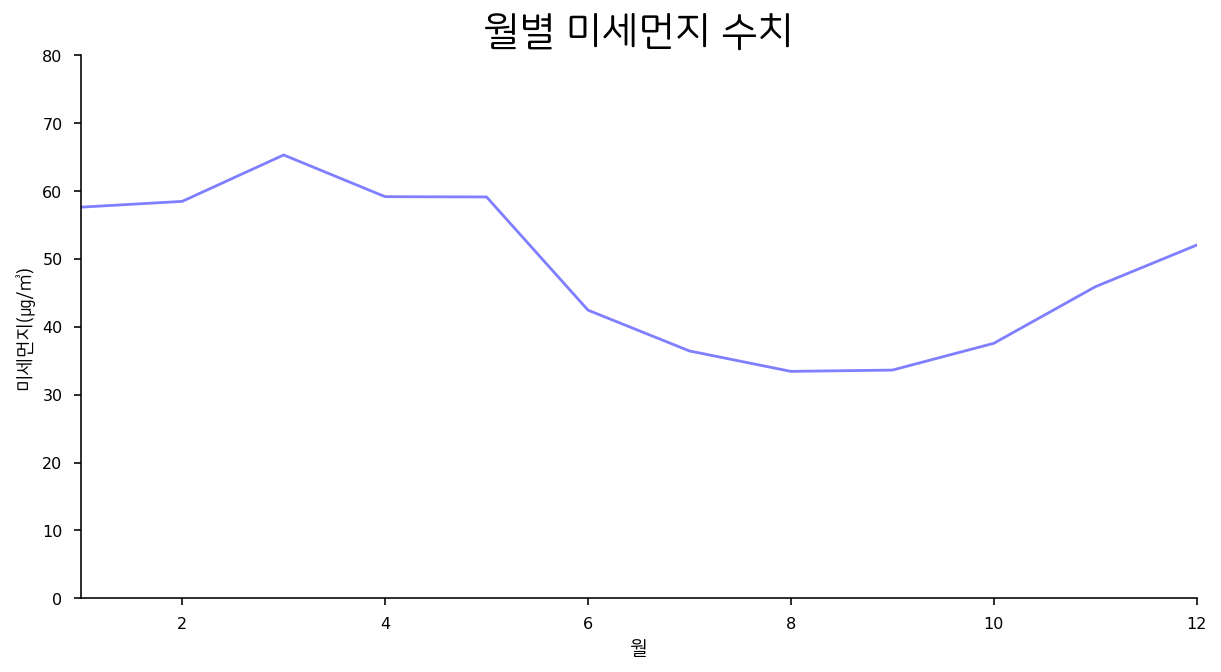

In [11]:
plt.figure(figsize=(10,5))
seoul[lambda x : x.년.isin([2017,2016,2015,2014,2013])].groupby('월')['미세먼지(㎍/㎥)'].mean().plot(color='b',alpha=0.5)
sns.despine()
plt.ylim([0,80])
plt.title('월별 미세먼지 수치', fontproperties = fontprop, size = 20)
plt.xlabel('월',fontproperties = fontprop)
plt.ylabel('미세먼지(㎍/㎥)',fontproperties = fontprop)
# 기간은 최근 5년

## 미세먼지 심하면 사람들이 관심을 많이 갖는가?

- 네이버.일별 최대검색량을 100으로 표현하여 상대적인 값(검색,클릭)
- 미세먼지 수치랑 검색량 위아래로 붙여서 보여주기 / twinx 쓰지 않고!

Text(0,0.5,'미세먼지(㎍/㎥)')

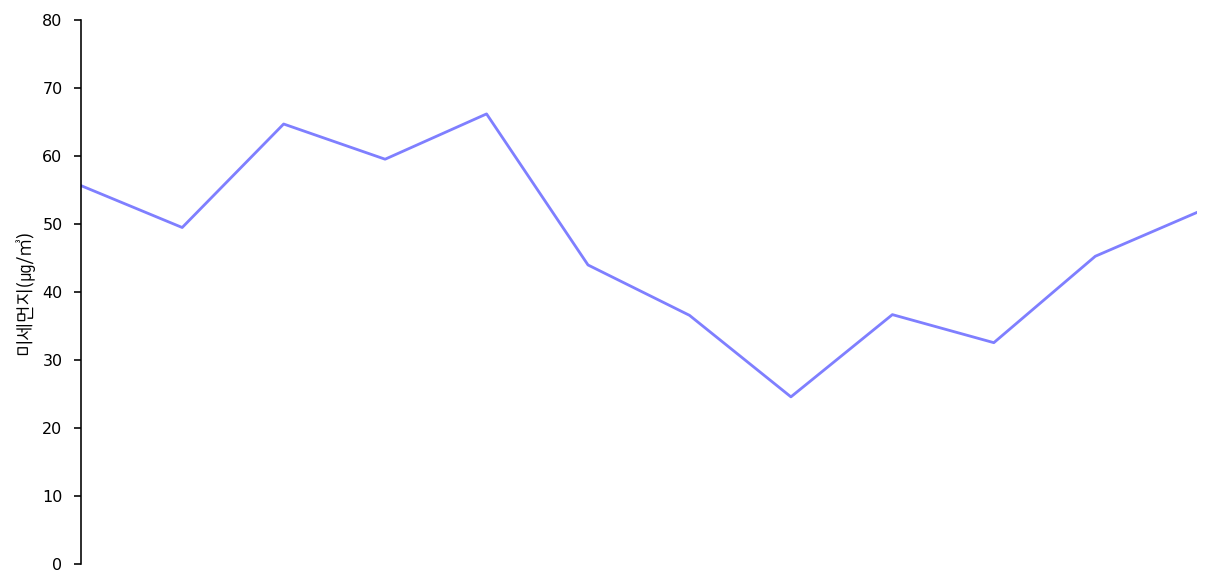

In [15]:
plt.figure(figsize=(10,5))
ax = seoul[lambda x : x.년 ==2017].groupby('월')['미세먼지(㎍/㎥)'].mean().plot(color='b',alpha=0.5)
sns.despine(bottom = True)
plt.ylim([0,80])
# plt.title('2017년 월별 미세먼지 수치', fontproperties = fontprop, size = 20)
ax.tick_params(bottom=False, labelbottom = False)
plt.xlabel('')
plt.ylabel('미세먼지(㎍/㎥)',fontproperties = fontprop)

Text(0,0.5,'상대적 검색량')

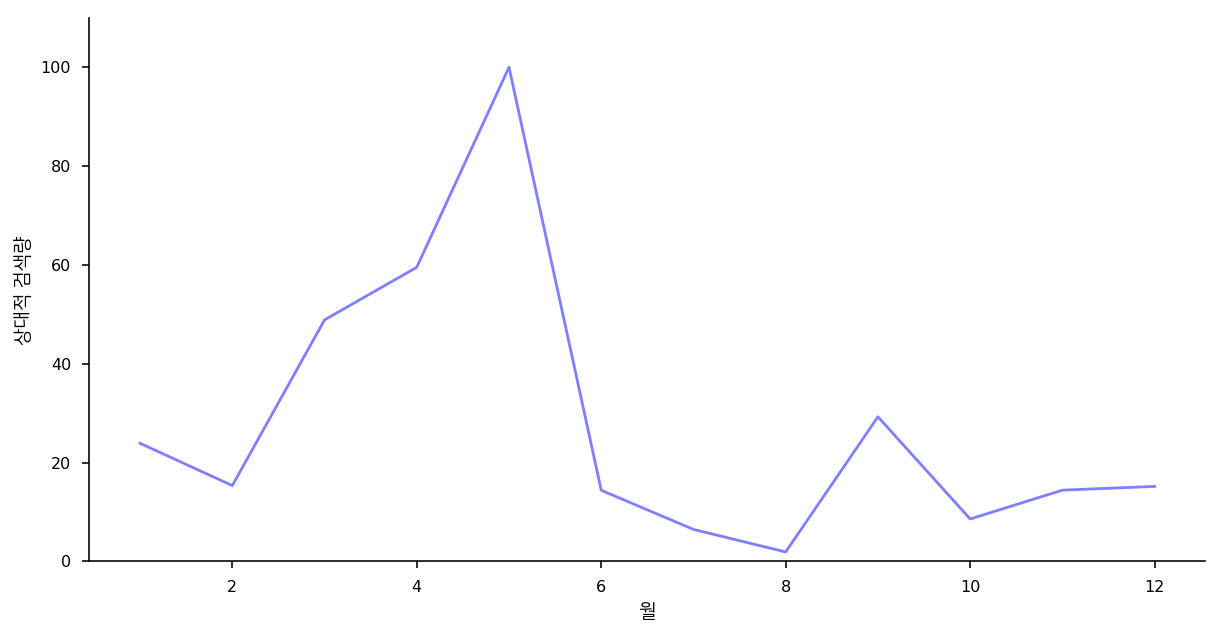

In [14]:
plt.figure(figsize=(10,5))
plt.plot(naver_month.월,naver_month.미세먼지,color='b',alpha=0.5)
sns.despine()
plt.ylim([0,110])
# plt.title('2017년 \'미세먼지\' 검색량(네이버)', fontproperties = fontprop, size = 20)
plt.xlabel('월',fontproperties = fontprop)
plt.ylabel('상대적 검색량',fontproperties = fontprop)
# 상대적임

## 대로변이 더 안 좋을까?

1.대로 vs not 대로
<br>
2.대로의 시계열 (차가 많아 질수록 더 않좋아질듯!) 

In [15]:
def road(x):
    if x[-1] == '로':
        return 'Y'
    else:
        return 'N'

In [16]:
seoul['도로여부']= seoul.측정소명.map(road)

In [17]:
seoul.head()

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),년,월,도로여부
0,201811,강남구,0.046,0.006,0.6,0.006,34.0,19.0,2018,11,N
1,201811,강남대로,0.053,0.005,0.9,0.005,43.0,24.0,2018,11,Y
2,201811,강동구,0.045,0.006,0.7,0.006,48.0,23.0,2018,11,N
3,201811,강변북로,0.058,0.005,0.8,0.005,44.0,27.0,2018,11,Y
4,201811,강북구,0.030,0.014,0.6,0.003,23.0,16.0,2018,11,N


### 2017년 비교
- 바그래프

Text(1,56,'53(㎍/㎥)')

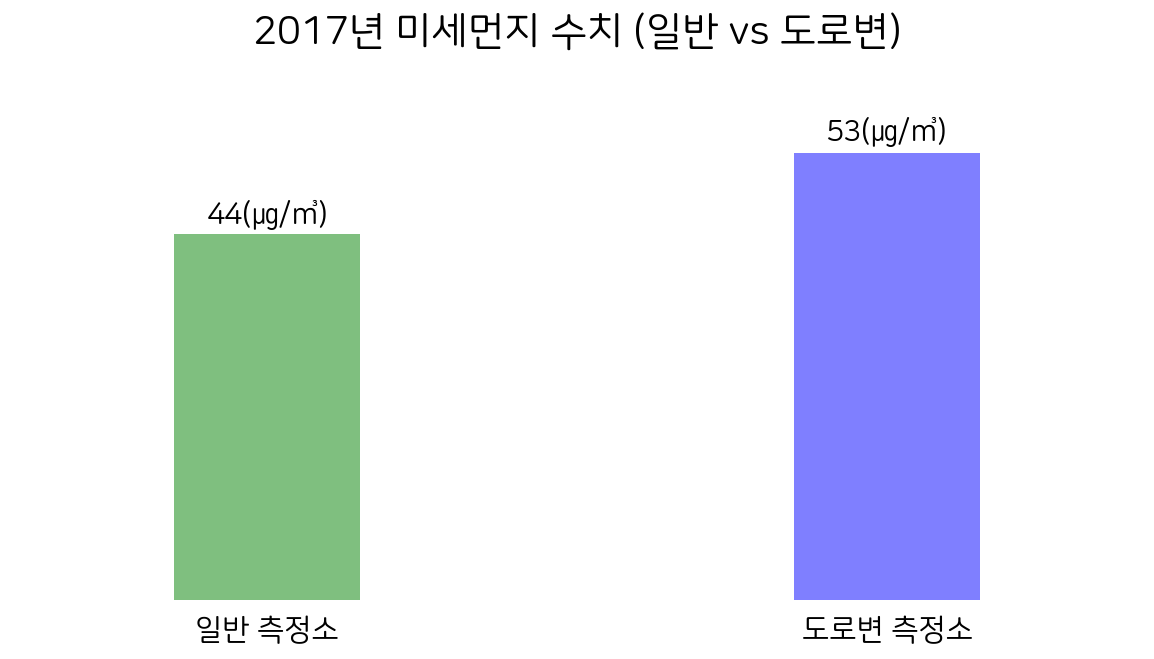

In [150]:
plt.figure(figsize=(10,5))
ax = seoul[lambda x : x.년==2017].groupby('도로여부')['미세먼지(㎍/㎥)'].mean().plot.bar(color=['g','b'],alpha=0.5,width=0.3)
sns.despine(bottom = True, left = True)
plt.title('2017년 미세먼지 수치 (일반 vs 도로변)', fontproperties = fontprop, size = 20)
plt.ylim([0,65])
ax.tick_params(bottom=False,left=False, labelleft=False)
ax.set_xlabel('')
ax.set_xticklabels(['일반 측정소','도로변 측정소'],fontproperties = fontprop, rotation = 0, fontsize = 15)
plt.text(0,46,'44(㎍/㎥)',horizontalalignment='center',verticalalignment='center',fontproperties = fontprop,fontsize = 15)
plt.text(1,56,'53(㎍/㎥)',horizontalalignment='center',verticalalignment='center',fontproperties = fontprop,fontsize=15)

### 2017년 월별 비교
- 선그래프
- legend 쓰지 않기

Text(13.1,65,'도로변 측정소')

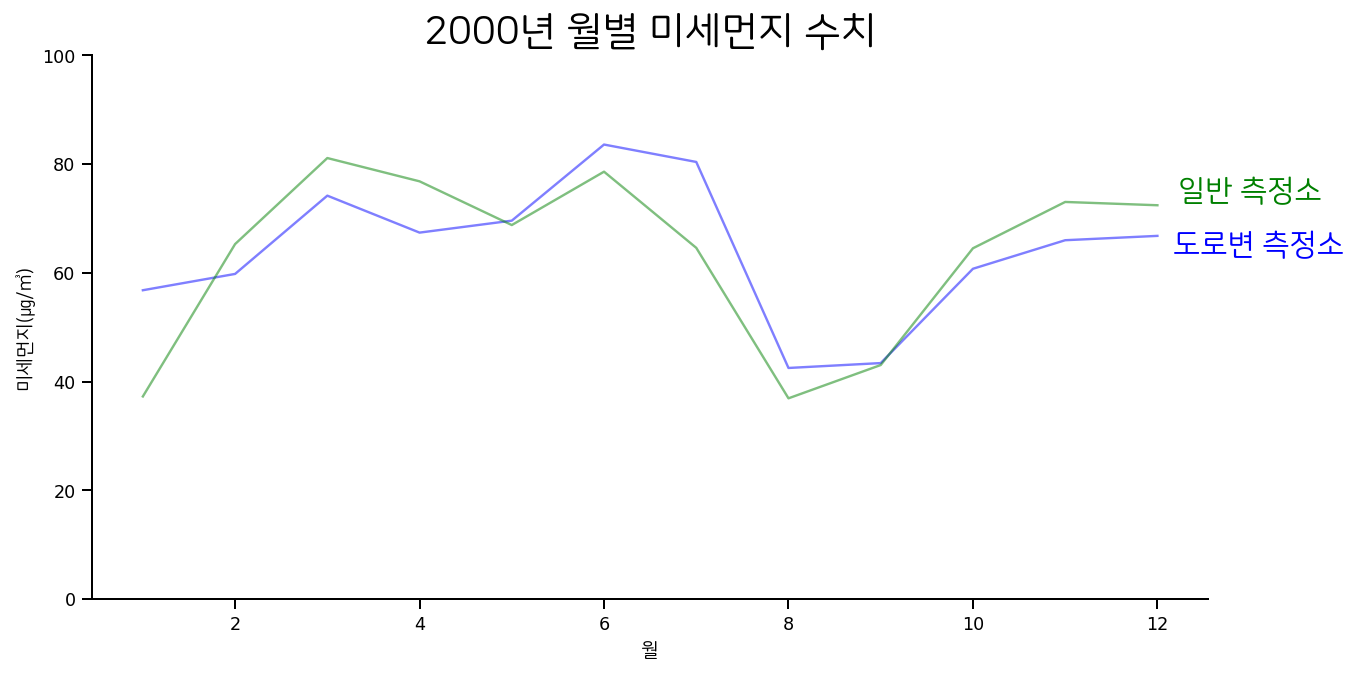

In [152]:
plt.figure(figsize=(10,5))
seoul[lambda x : (x.년==2000)&(x.도로여부=='Y')].groupby('월')['미세먼지(㎍/㎥)'].mean().plot(color='b',alpha=0.5)
seoul[lambda x : (x.년==2000)&(x.도로여부=='N')].groupby('월')['미세먼지(㎍/㎥)'].mean().plot(color='g',alpha=0.5)
sns.despine()
plt.ylim([0,100])
plt.title('2000년 월별 미세먼지 수치', fontproperties = fontprop, size = 20)
plt.xlabel('월',fontproperties = fontprop)
plt.ylabel('미세먼지(㎍/㎥)',fontproperties = fontprop)
plt.text(13,75,'일반 측정소',horizontalalignment='center',verticalalignment='center',fontproperties = fontprop,fontsize=15,color='g')
plt.text(13.1,65,'도로변 측정소',horizontalalignment='center',verticalalignment='center',fontproperties = fontprop,fontsize=15,color='b')

Text(13.1,60,'도로변 측정소')

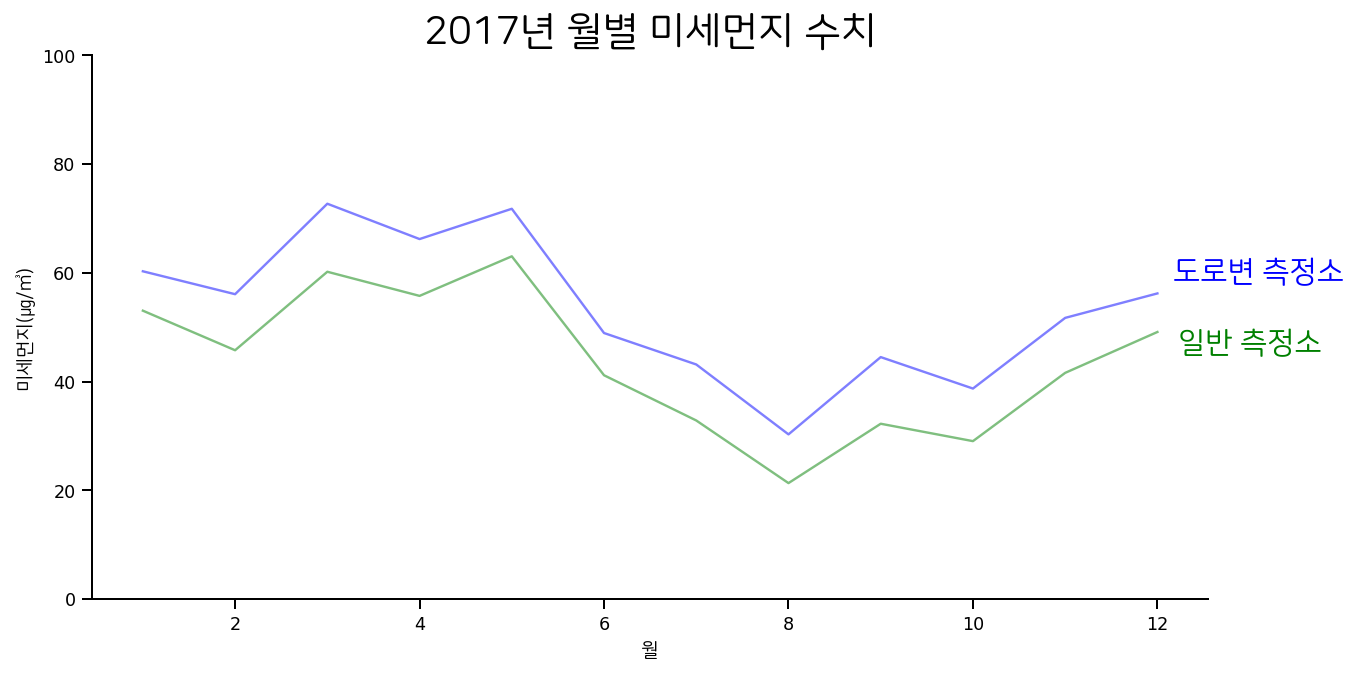

In [153]:
plt.figure(figsize=(10,5))
seoul[lambda x : (x.년==2017)&(x.도로여부=='Y')].groupby('월')['미세먼지(㎍/㎥)'].mean().plot(color='b',alpha=0.5)
seoul[lambda x : (x.년==2017)&(x.도로여부=='N')].groupby('월')['미세먼지(㎍/㎥)'].mean().plot(color='g',alpha=0.5)
sns.despine()
plt.ylim([0,100])
plt.title('2017년 월별 미세먼지 수치', fontproperties = fontprop, size = 20)
plt.xlabel('월',fontproperties = fontprop)
plt.ylabel('미세먼지(㎍/㎥)',fontproperties = fontprop)
plt.text(13,47,'일반 측정소',horizontalalignment='center',verticalalignment='center',fontproperties = fontprop,fontsize=15,color='g')
plt.text(13.1,60,'도로변 측정소',horizontalalignment='center',verticalalignment='center',fontproperties = fontprop,fontsize=15,color='b')

### 결론 부분

- 미세먼지가 심한 날에는 사람들의 관심이 증가한다.
- 핫이슈인 미세먼지!
- 미세먼지 연관 검색어 -> 사람들은 미세먼지를 보고 야외활동을 할지, 마스크를 쓸지 결정
- 미세먼지 하면 생각나는 서비스 or 기업? -> 블루오션
- 차가 많이 다니는 곳은 미세먼지가 더 심함
- 측정소 위치에 따라 미세먼지의 차이가 결정됨 -> 그렇다면 좀 더 세세한 서비스가 필요하지 않을까?

# 워드클라우드

### 크롤링 데이터 전처리

In [4]:
news = pd.read_csv('news.csv')

In [5]:
news = news[news.isNaver == 'O']

In [6]:
news.reset_index(inplace = True, drop=True)

In [7]:
text =''
for i in range(len(news)):
    text = text + news.main[i]

### konlpy (이전 버전임)
- 명사 빈도 분석

In [8]:
import konlpy
from konlpy.tag import Twitter
from collections import Counter

In [9]:
Twitter = Twitter()

In [10]:
tokens_noun=Twitter.nouns(text)

In [11]:
count_data = Counter(tokens_noun).most_common(500)

In [12]:
common_data = list()
for i in range(len(count_data)):
    if len(count_data[i][0]) != 1:
        common_data.append(count_data[i])

In [13]:
nouns_dict = dict(common_data)

### 워드클라우딩

In [14]:
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
%matplotlib inline 

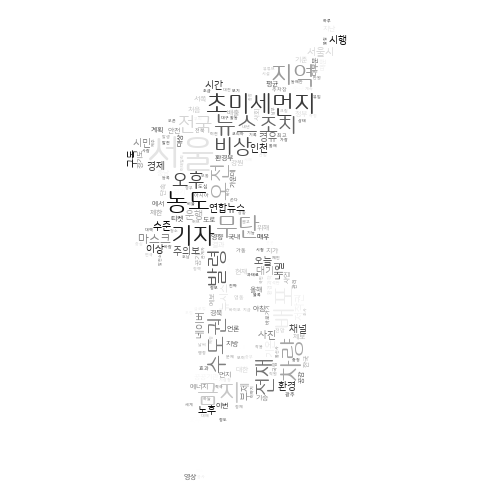

In [15]:
wordcloud=WordCloud(font_path="c:/Windows/Fonts/NanumSquareRoundR.ttf",
                   background_color="white",
                    mask=np.array(Image.open("koreanmap.png")),
                    relative_scaling=0.2, # 빈도수 or 랭킹 을 고려할지!!
                    colormap = 'gist_gray',
                    max_font_size=40
                   ).generate_from_frequencies(nouns_dict) 

wordcloud.to_image()